<a href="https://colab.research.google.com/github/tesygithub/Machine-Learning/blob/main/%20Clustring%20Cardiovascular%20Risk%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here. https://github.com/tesygithub

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [68]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


<Axes: >

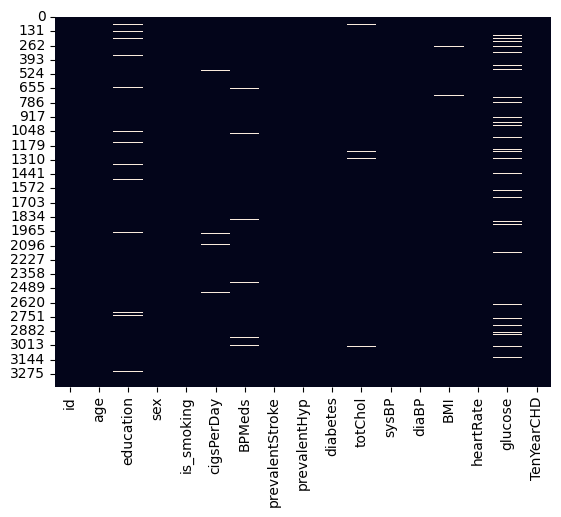

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
selected_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
group_means = df.groupby('TenYearCHD')[selected_columns].mean()
group_means

mean_difference = group_means.loc[1] - group_means.loc[0]
mean_difference

summary = pd.DataFrame({
    'No risk mean': group_means.loc[0],
    'Risk mean': group_means.loc[1],
    'Difference (Risk - No Risk)': mean_difference
})

summary = summary.round(2)

print(summary)
group_means

            No risk mean  Risk mean  Difference (Risk - No Risk)
age                48.73      54.13                         5.40
cigsPerDay          8.73      10.95                         2.21
totChol           235.28     247.22                        11.94
sysBP             130.60     143.85                        13.25
diaBP              82.19      86.76                         4.57
BMI                25.68      26.45                         0.77
heartRate          75.88      76.55                         0.68
glucose            80.66      89.97                         9.31


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.728031,8.734430,235.279494,130.603856,82.194338,25.679565,75.875304,80.662969
1,54.129159,10.947059,247.216270,143.854207,86.763209,26.452560,76.552941,89.970339


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##### 1. Why did you pick the specific chart?

In [13]:
# Chart - 1 visualization code
df.describe().columns


Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
def histogram_with_kde(dataframe):

  num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
  num_cols  = [col for col in num_cols if dataframe [col].nunique() > 2]

  for col in num_cols[1:-1]:
     plt.figure(figsize=(10, 6))
     sns.histplot(dataframe[col].dropna(), kde=True, color='skyblue', edgecolor='black')
     plt.axvline(dataframe[col].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean : {dataframe[col].mean():.2f}")
     plt.axvline(dataframe[col].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median : {dataframe[col].median():.2f}")
     plt.title(f'Distribution of {col}')
     plt.xlabel(col)
     plt.ylabel('Frequency')
     plt.legend()
     plt.tight_layout()
     plt.show()

     plt.histograme_with_kde(df)


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

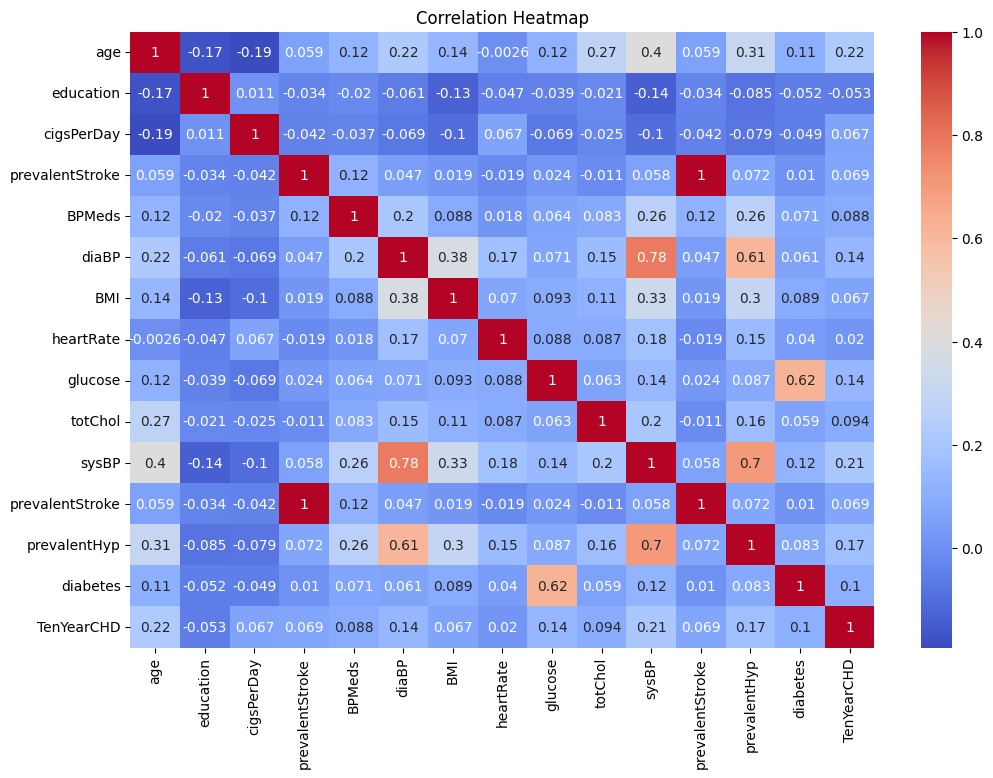

In [15]:
# Chart - 2 visualization code
df.columns
df_numerical = df[['age','education', 'cigsPerDay', 'prevalentStroke', 'BPMeds', 'diaBP', 'BMI', 'heartRate', 'glucose',
                   'totChol', 'sysBP', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD' ]]
plt.figure(figsize=(12,8))
sns.heatmap(df_numerical.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

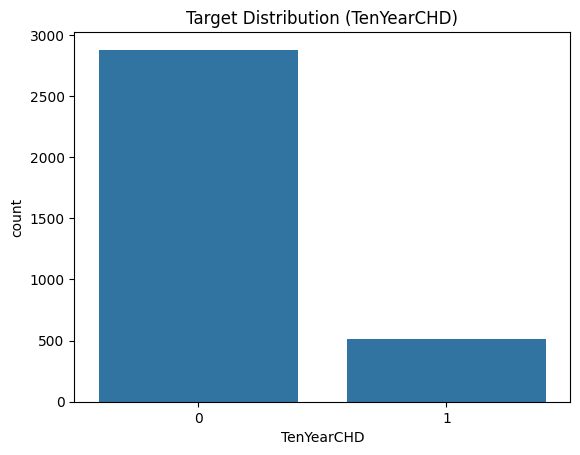

In [16]:
sns.countplot(x='TenYearCHD', data=df_numerical)
plt.title('Target Distribution (TenYearCHD)')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

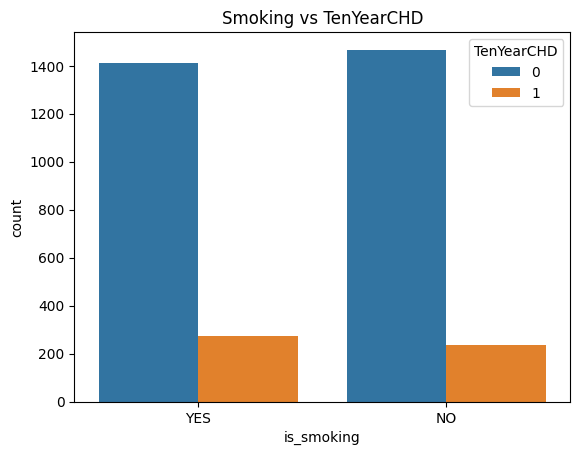

In [17]:
# Chart - 4 visualization code
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df)
plt.title('Smoking vs TenYearCHD')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

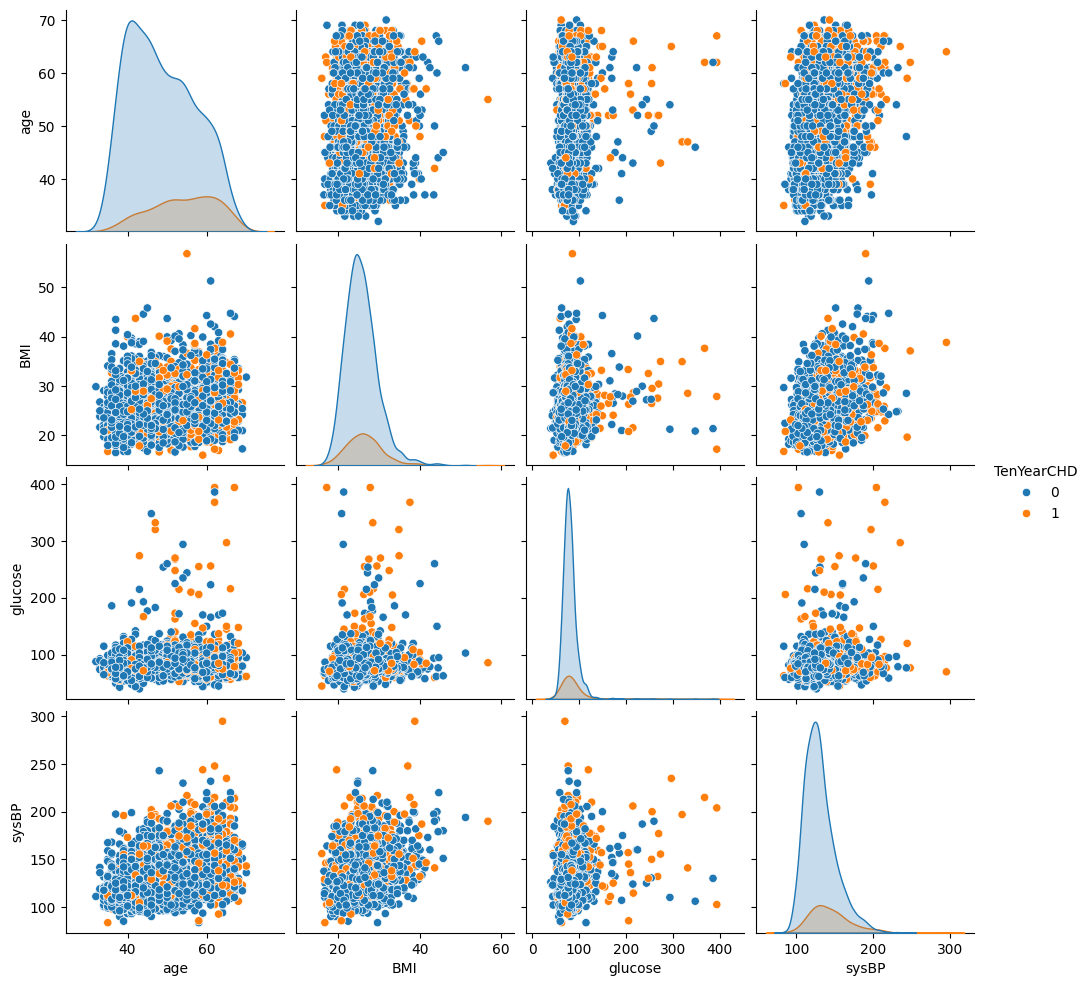

In [18]:
# Chart - 5 visualization code
sns.pairplot(df[['age', 'BMI', 'glucose', 'sysBP', 'TenYearCHD']], hue='TenYearCHD')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

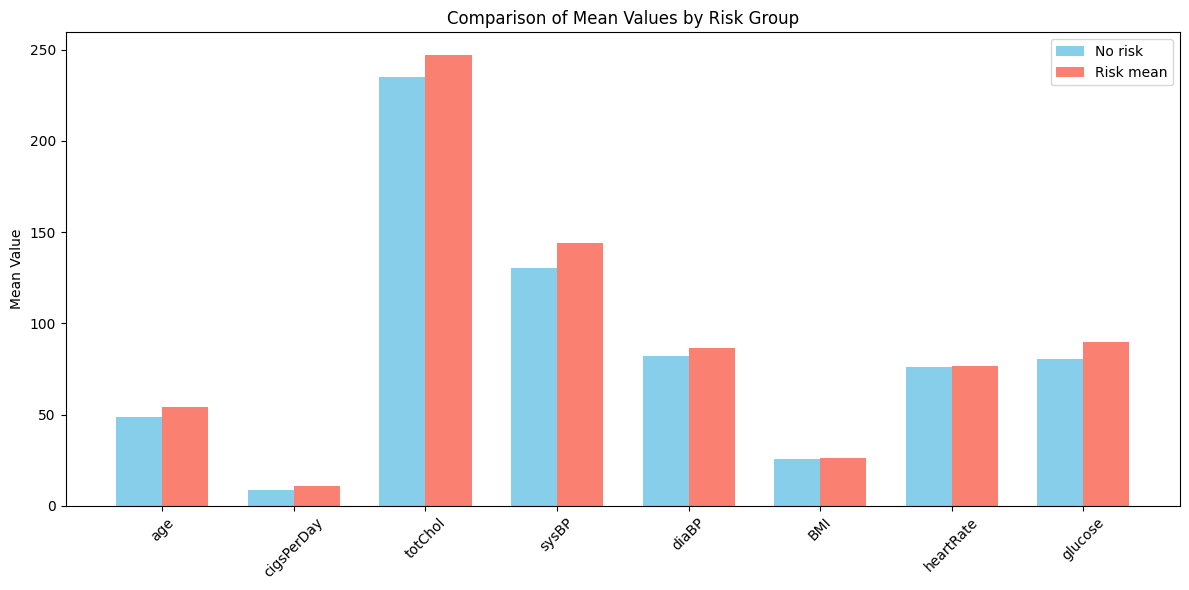

In [19]:
# Chart - 6 visualization code
group_means = group_means.T

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(group_means))
width = 0.35


ax.bar([i - width/2 for i in x], group_means[0], width=width, label='No risk', color='skyblue')
ax.bar([i + width/2 for i in x], group_means[1], width=width, label='Risk mean', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(group_means.index, rotation=45)
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Mean Values by Risk Group')
ax.legend()

plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


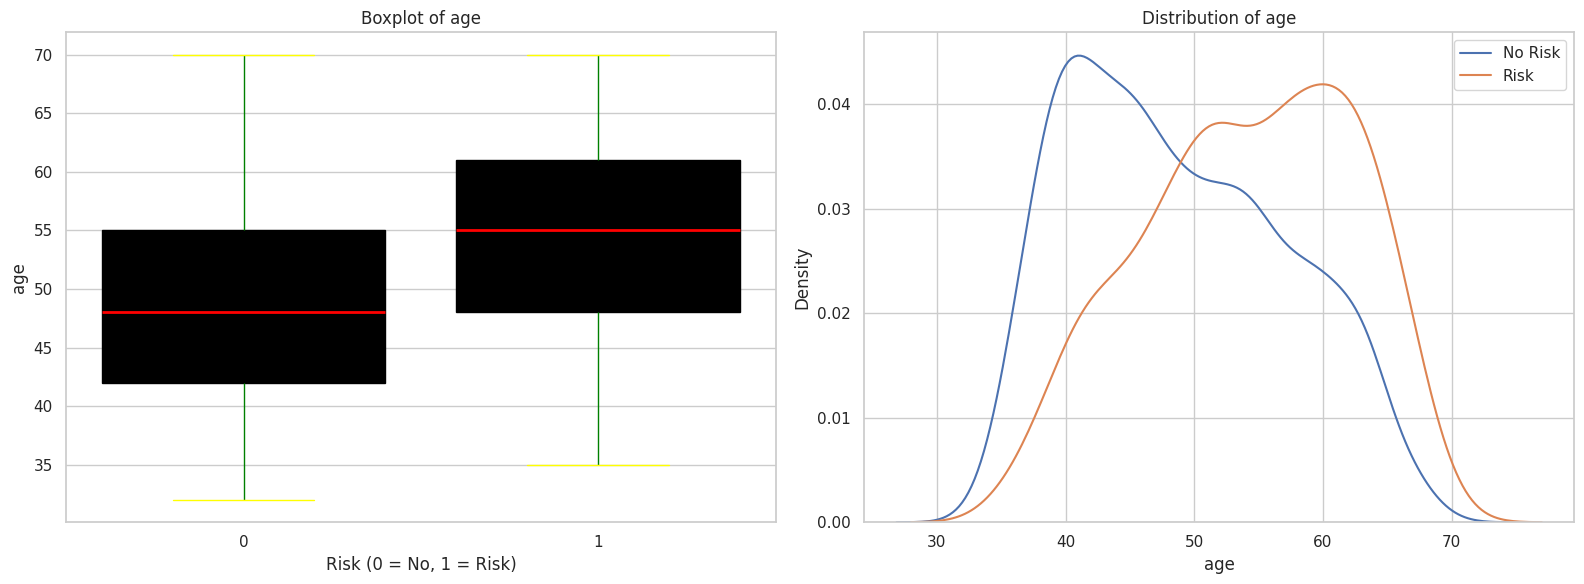

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


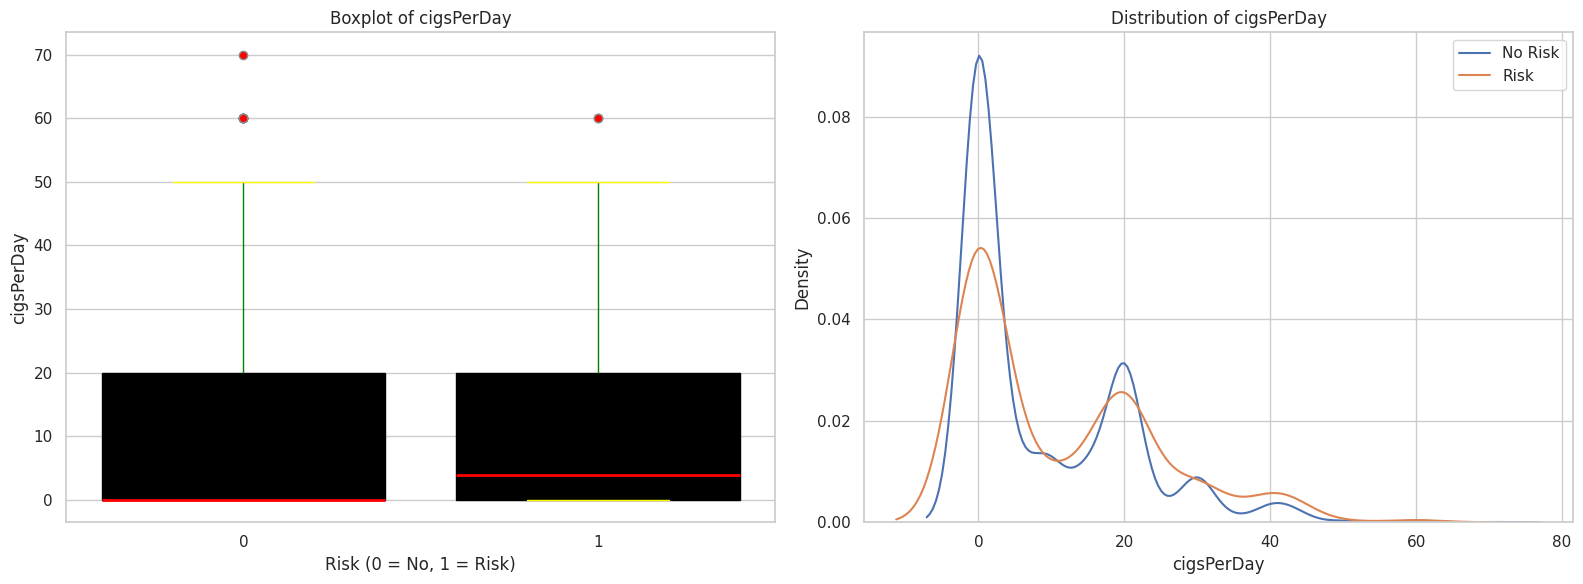

Skipping 'totchol' – not found in DataFrame columns.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


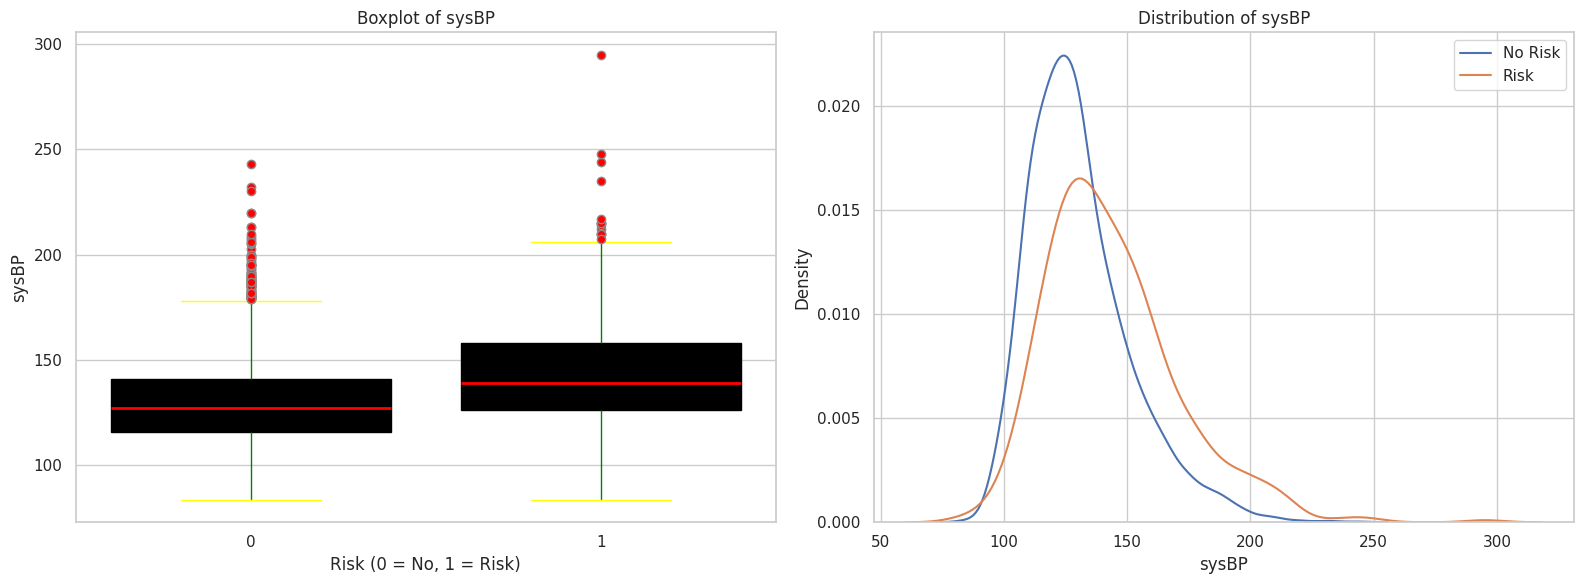

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


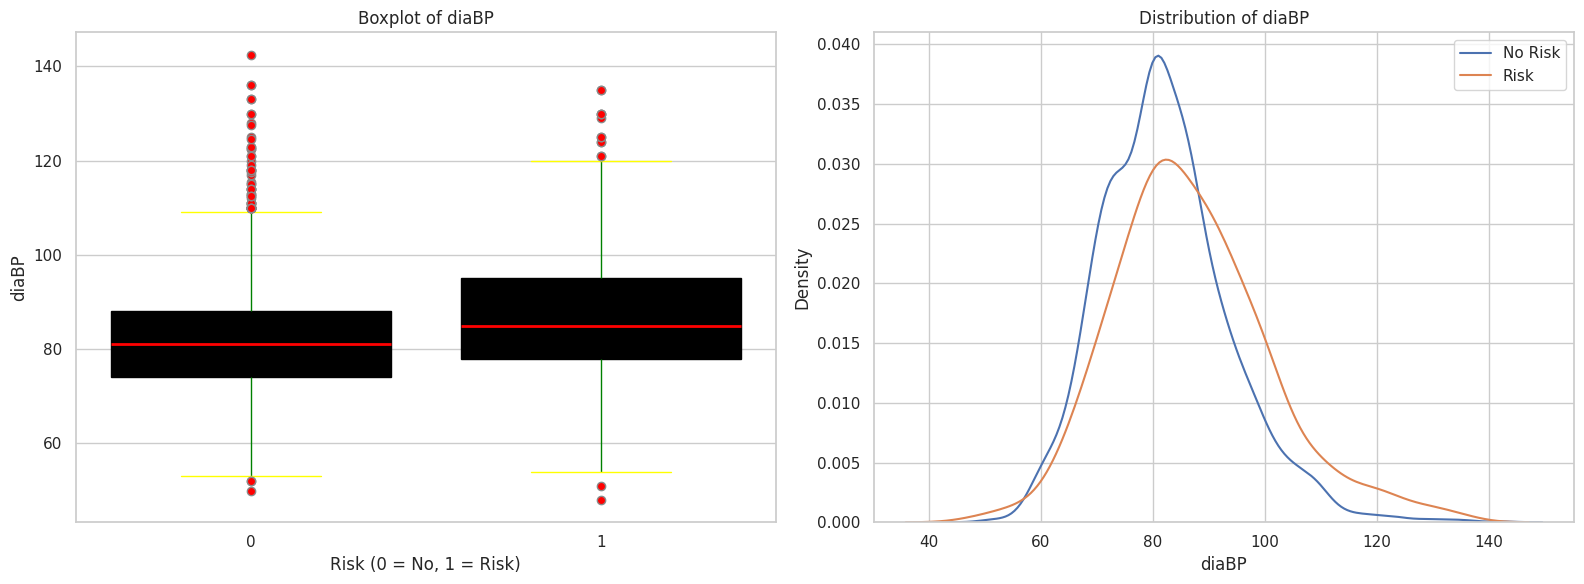

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


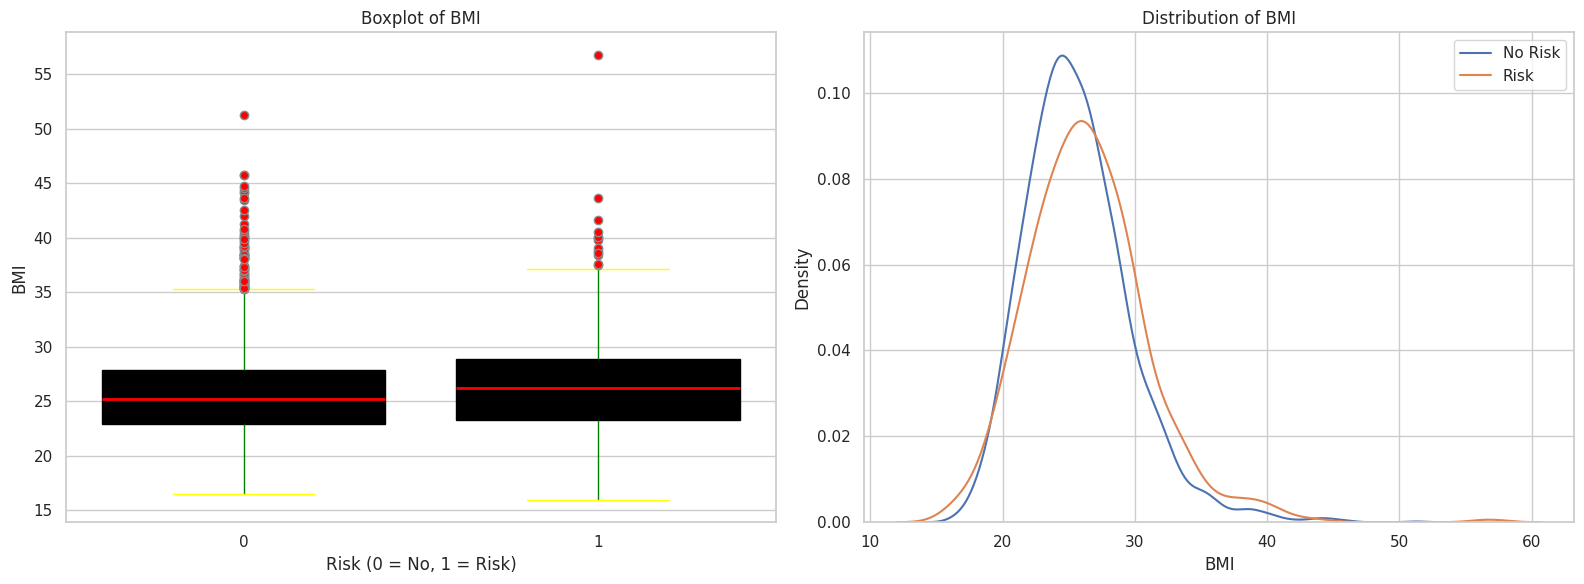

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


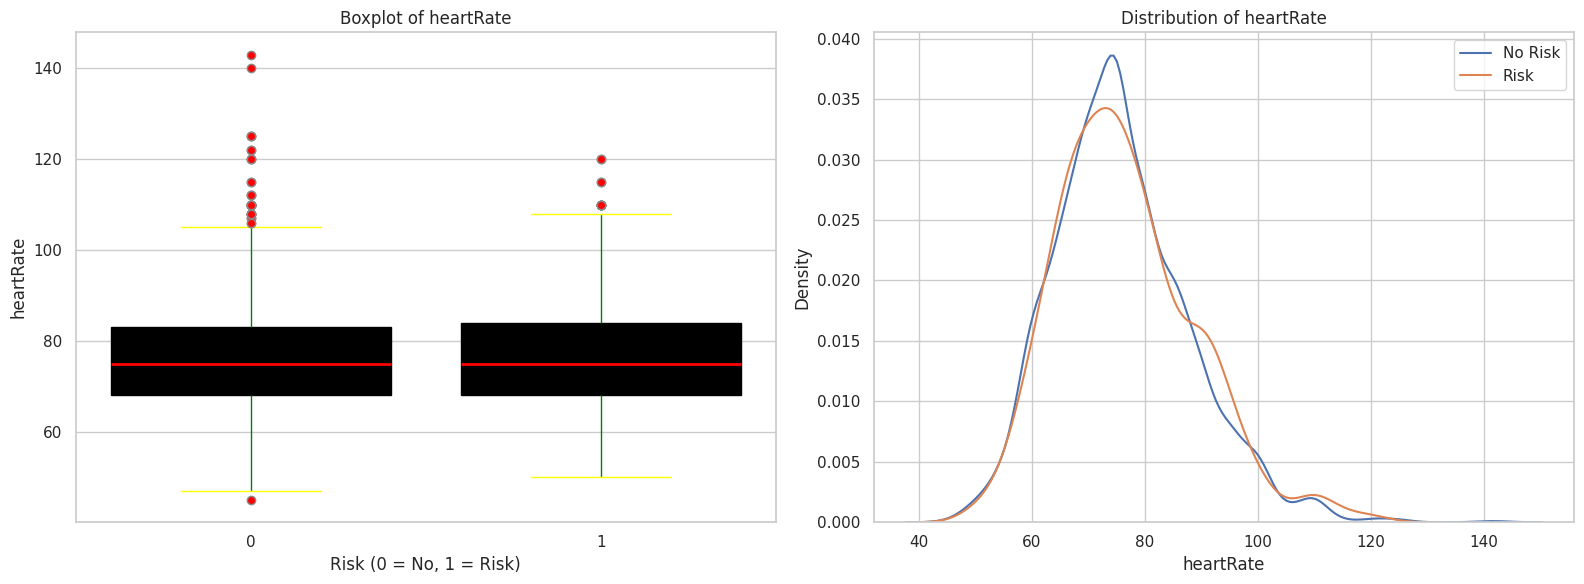

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


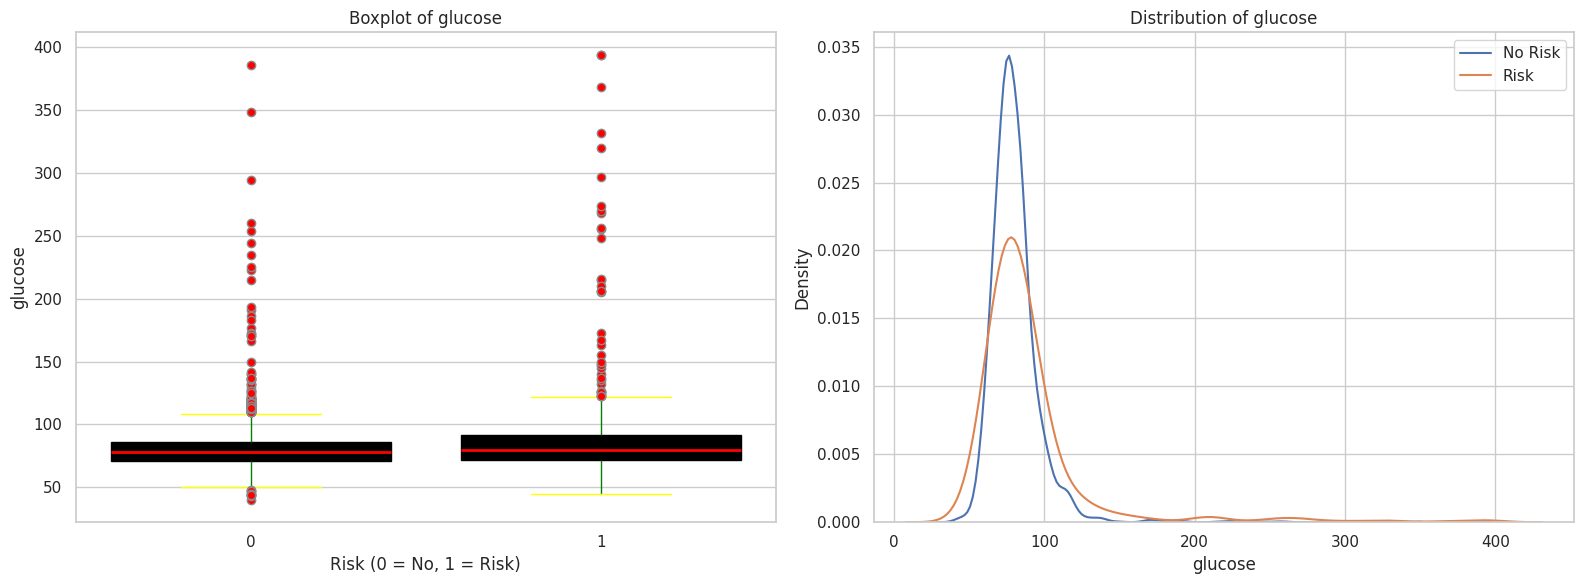

In [20]:
# Chart - 7 visualization code
Features = ['age', 'cigsPerDay', 'totchol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
sns.set(style="whitegrid")

for item in Features:
    if item not in df.columns:
        print(f"Skipping '{item}' – not found in DataFrame columns.")
        continue

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.boxplot(
        x='TenYearCHD',
        y=item,
        data=df,
        ax=axes[0],
        color='#F4F8D3',
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(color='black'),
        whiskerprops=dict(color='green'),
        capprops=dict(color='yellow'),
        flierprops=dict(markerfacecolor='red', marker='o')
    )
    axes[0].set_title(f'Boxplot of {item}')
    axes[0].set_xlabel('Risk (0 = No, 1 = Risk)')
    axes[0].set_ylabel(item)

    sns.kdeplot(df[df['TenYearCHD'] == 0][item], label='No Risk', ax=axes[1], fill=False)
    sns.kdeplot(df[df['TenYearCHD'] == 1][item], label='Risk', ax=axes[1], fill=False)
    axes[1].set_title(f'Distribution of {item}')
    axes[1].set_xlabel(item)
    axes[1].set_ylabel('Density')
    axes[1].legend()

    plt.tight_layout()
    plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [21]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [22]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [23]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [24]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [25]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [26]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [27]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [28]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
df_logistics = df.dropna().copy()
df_logistics.shape

(2927, 17)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [30]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [31]:
# Encode your categorical columns
df_logistics['sex'] = df_logistics['sex'].map({'M': 0, 'F': 1})
df_logistics['is_smoking'] = df_logistics['is_smoking'].map({'NO': 0, 'YES': 1})
df_logistics.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [32]:
# Expand Contraction

#### 2. Lower Casing

In [33]:
# Lower Casing

#### 3. Removing Punctuations

In [34]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [35]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [36]:
# Remove Stopwords

In [37]:
# Remove White spaces

#### 6. Rephrase Text

In [38]:
# Rephrase Text

#### 7. Tokenization

In [39]:
# Tokenization

#### 8. Text Normalization

In [40]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [41]:
# POS Taging

#### 10. Text Vectorization

In [42]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting
x = df_logistics.drop(['TenYearCHD', 'id'], axis=1)
y = df_logistics['TenYearCHD']
df_logistics

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,1,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,1,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [45]:
# Transform Your data

### 6. Data Scaling

In [46]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'cigsPerDay','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df_logistics[num_features] = scaler.fit_transform(df_logistics[num_features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [47]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test.shape

(586, 15)

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,confusion_matrix
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
ypreds = model.predict_proba(X_test)[:, 1]




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    average_precision_score,
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
)
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, ypreds),
    'Average Precision': average_precision_score(y_test, ypreds),
}

pd.DataFrame(metrics.items(), columns=['Metric', 'Value']).style.background_gradient(cmap='Blues')



,Metric,Value
0,Accuracy,0.849829
1,Precision,0.571429
2,Recall,0.088889
3,F1 Score,0.153846
4,ROC AUC,0.715524
5,Average Precision,0.352321


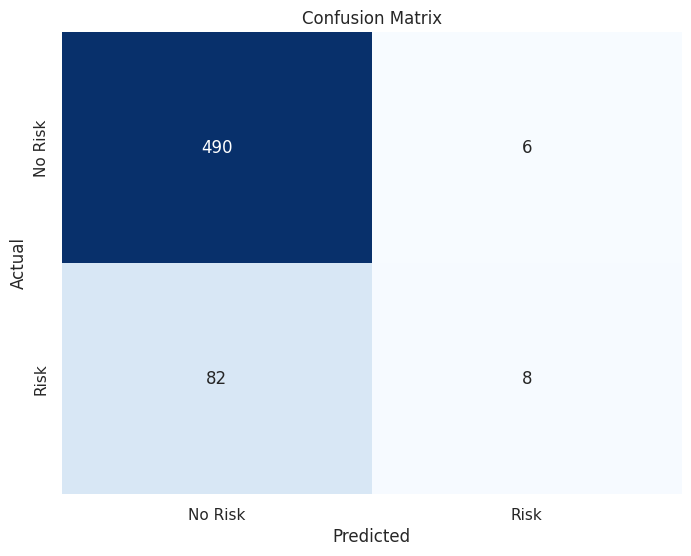

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

















##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

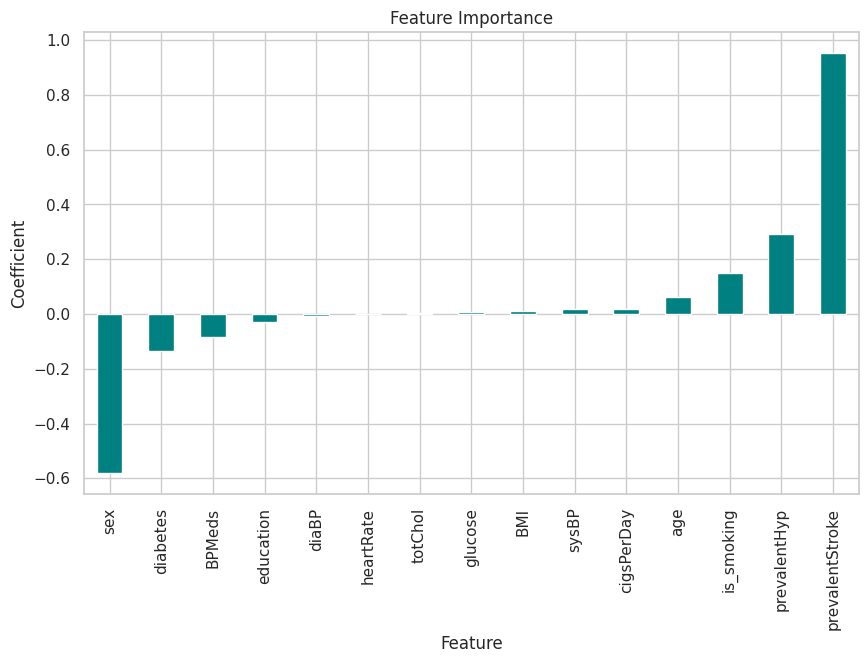

In [53]:
# Visualizing evaluation Metric Score chart
coefs = pd.Series(model.coef_[0], index=x.columns)
plt.figure(figsize=(10, 6))
coefs.sort_values().plot(kind='bar',color='teal')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid = grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid.fit(x_train_scaled, y_train_resampled)


y_pred = grid.predict(x_test_scaled)
ypreds = grid.predict_proba(x_test_scaled)[:, 1]


print("Best Parameters", grid.best_params_)
print("Roc Auc Score", roc_auc_score(y_test, ypreds))
print(classification_report(y_test, y_pred))




Best Parameters {'C': 0.1, 'penalty': 'l2'}
Roc Auc Score 0.6715277777777778
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       496
           1       0.24      0.50      0.32        90

    accuracy                           0.68       586
   macro avg       0.56      0.60      0.56       586
weighted avg       0.79      0.68      0.72       586



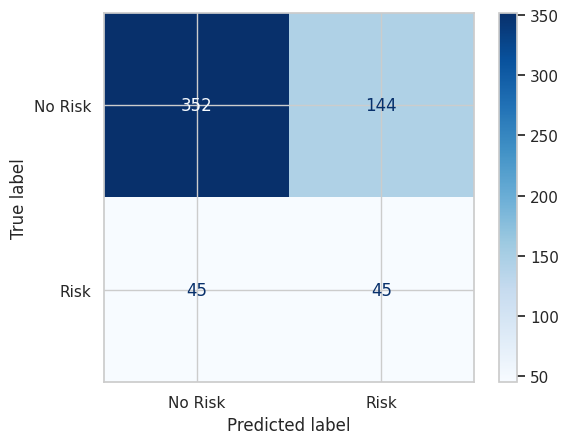

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Risk'])
disp.plot(cmap='Blues')


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

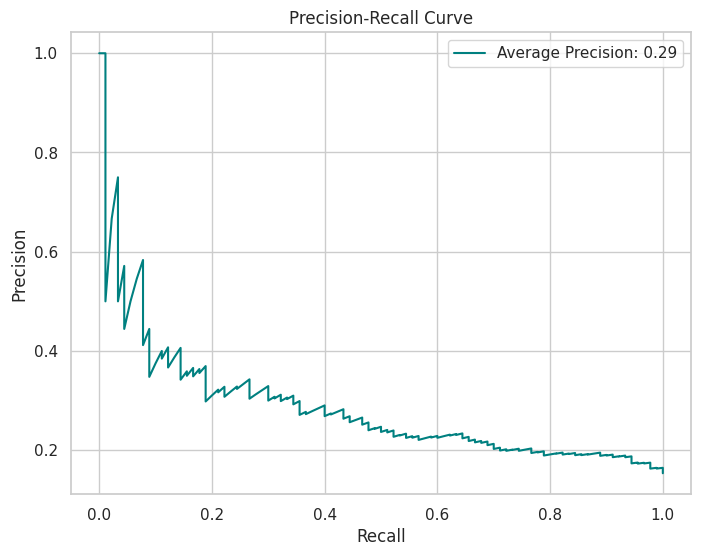

In [55]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.metrics import precision_recall_curve,average_precision_score

precision, recall, _ = precision_recall_curve(y_test, ypreds)
ap = average_precision_score(y_test, ypreds)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision: {ap:.2f}', color='teal')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model




##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***